# Исследовательский анализ сети фитнес-центров 

Импортируем необходимые библиотеки

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
plt.style.use('ggplot')
import numpy as np

## Шаг 1. Загрузим данные

Прочитаем данные и исследуем о них общую информацию

In [ ]:
data = pd.read_csv('/datasets/gym_churn.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [ ]:
data.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


Приведем названия столбцов к нижнему регистру

In [ ]:
data.columns = data.columns.str.lower()

In [ ]:
data.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

## Шаг 2. Проведем исследовательский анализ данных

- Посмотрим на датасет: есть ли в нем отсутствующие признаки, изучим средние значения и стандартные отклонения (пригодится метод describe());
- Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуемся методом groupby());
- Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
- Построим матрицу корреляций и отобразим её.

In [ ]:
data.isnull().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

Пропущенных значений в данных нет

In [ ]:
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Сразу замечаем, что 26% клиентов фитнес центра ушли в отток. Что касается стандартных отклонений перед построением моделей прогнозирования нужно будет произвести стандартизацию, чтобы стандартное отклонение в признаках было равно 1.

In [ ]:
data.groupby('churn').agg('mean') 
# посмотрим на средние значения в группе тех, кто ушел в отток и в группе тех, кто остался

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Уже смотря на эту таблицу можем сделать первоначальные выводы, что как правило остаются те, у кого больше контрактный период действия абонемента, кто чаще посещает групповые занятия и кто приходит по приглашению от друга. В отток, как правило, уходят те, кто посещает спортзал менее 2 раз в неделю. В среднем у тех, кто прекращает посещать фитнес-центр, среднее время с момента первого обращения в фитнес-центр составляет менее месяца.

Построим гистограммы распределения признаков для тех, кто ушел в отток и тех, кто остался.

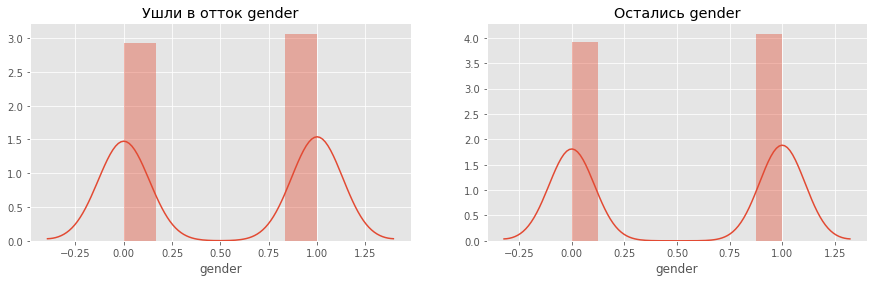

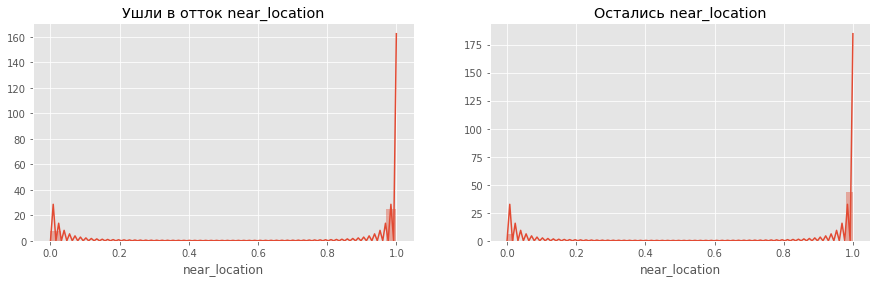

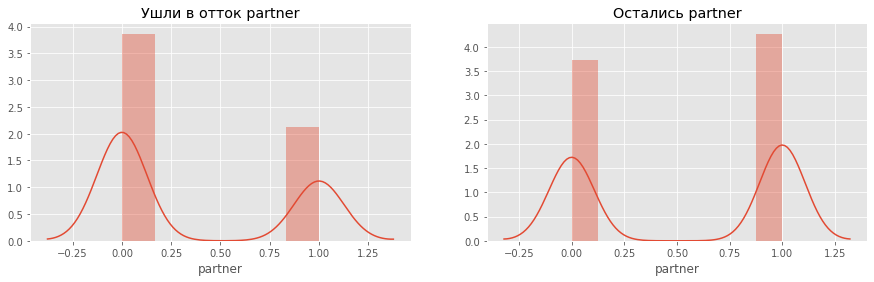

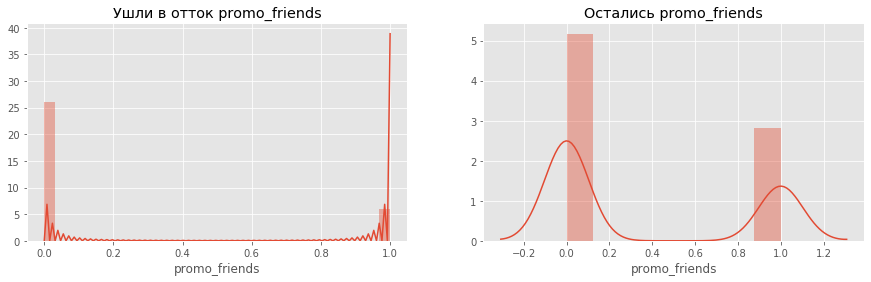

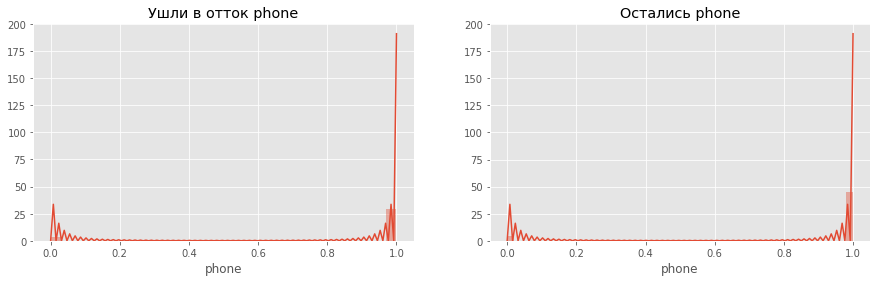

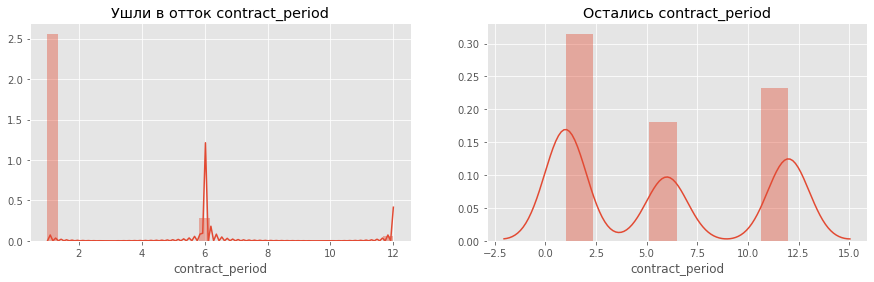

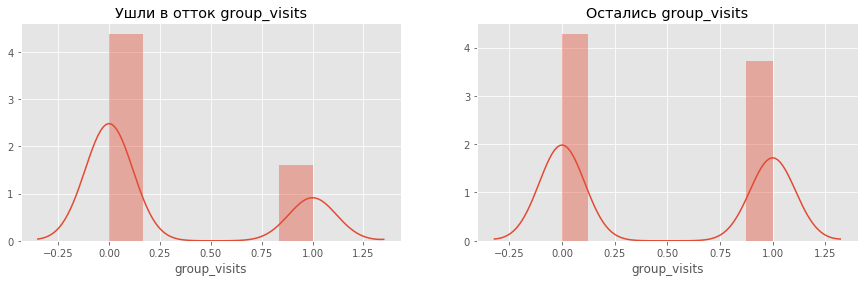

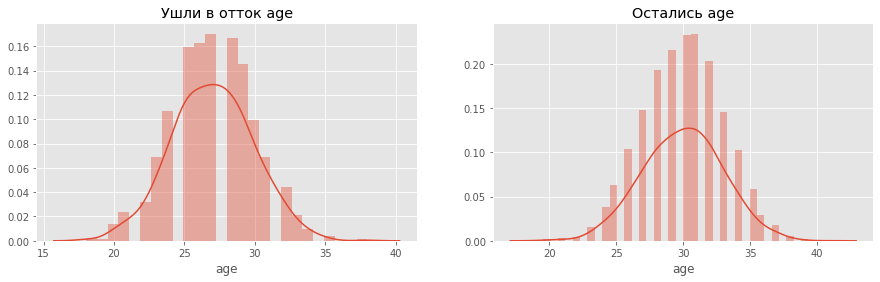

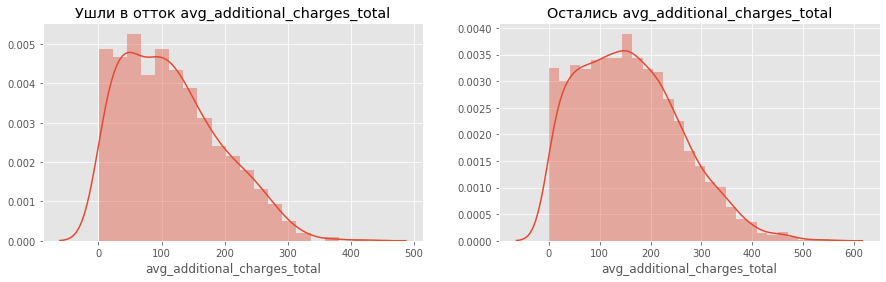

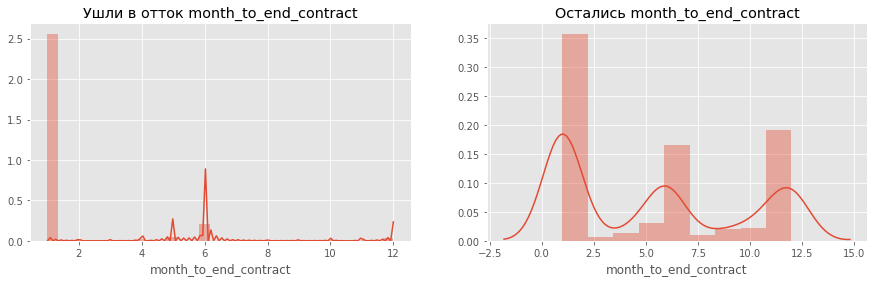

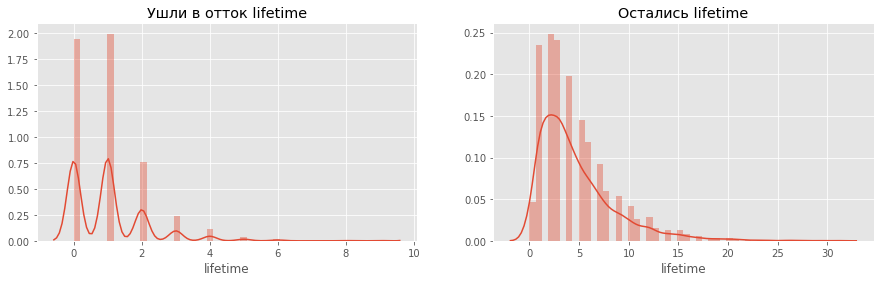

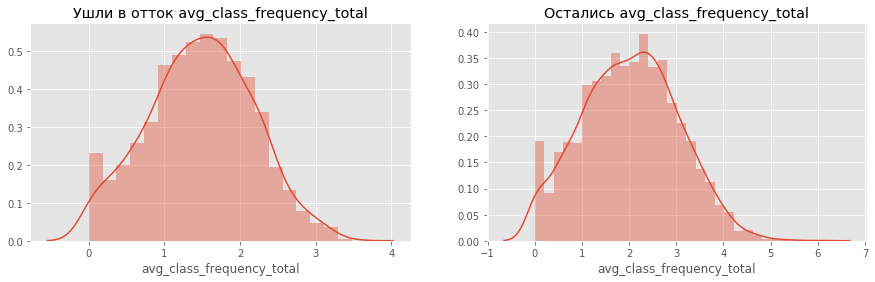

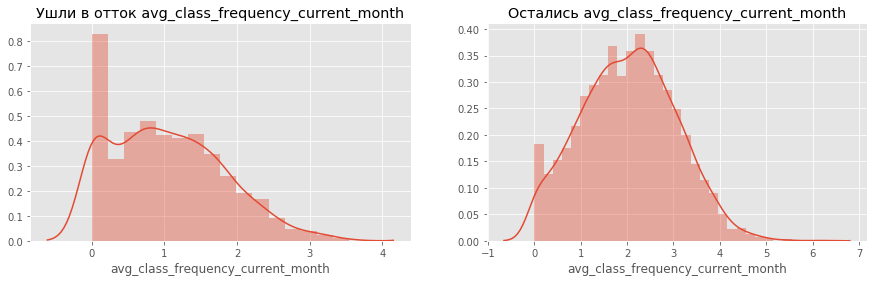

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


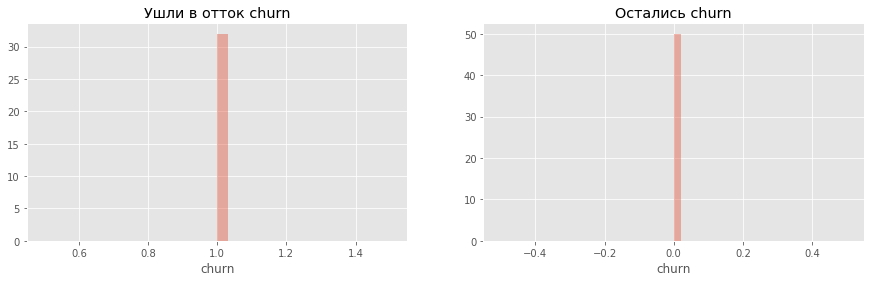

In [ ]:
for column in data.columns:
    fig, axes = plt.subplots(1, 2, figsize = (15, 4))
    sns.distplot(data.query('churn == 1')[column], ax = axes[0])
    axes[0].set_title('Ушли в отток' + ' ' + column)
    sns.distplot(data.query('churn == 0')[column], ax = axes[1])
    axes[1].set_title('Остались' + ' ' + column)
    plt.show()

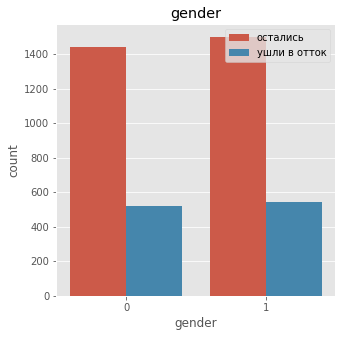

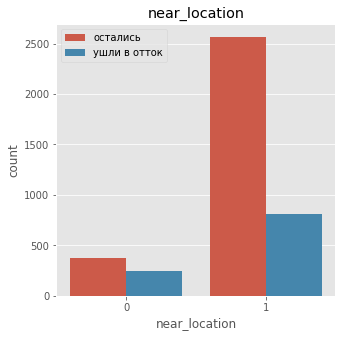

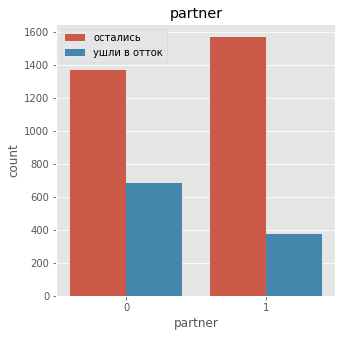

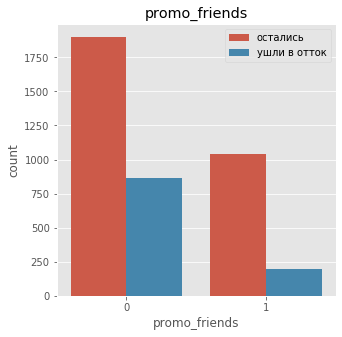

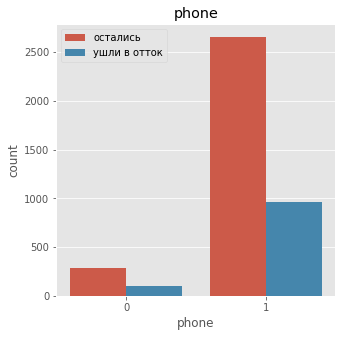

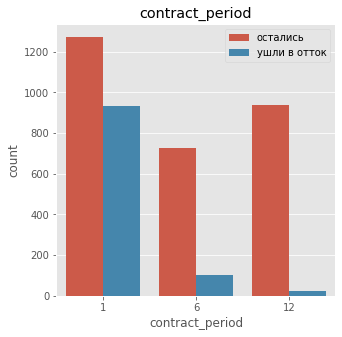

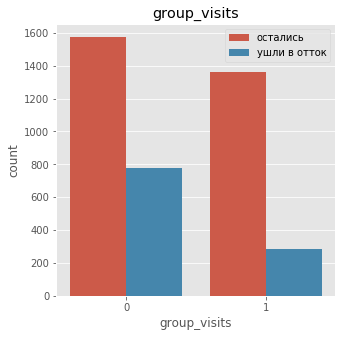

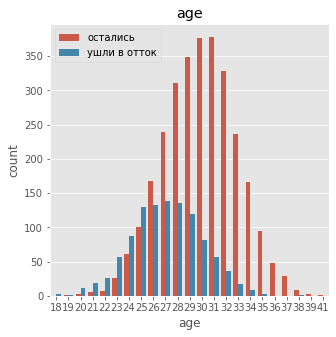

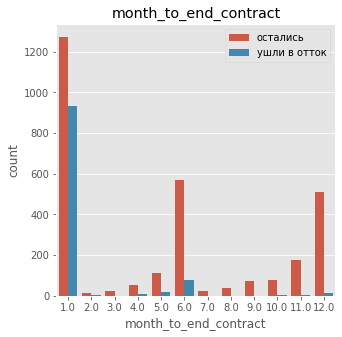

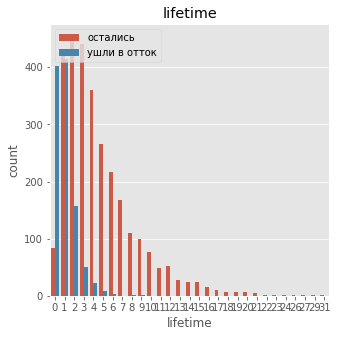

In [ ]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'age', 'month_to_end_contract', 'lifetime']:
    plt.figure(figsize=(5,5))
    sns.countplot(x=data[column], hue='churn', data=data)
    plt.title(column)
    plt.legend(['остались', 'ушли в отток'])
    plt.show()

Проанализировав данные, сделаем выводы: 
* пол не влияет на факт оттока
* больше всего посетителей выбирает спортзал, расположенный ближе всего от дома или работы
* примерно половина клиентов клуба являются сотрудниками компании-партнера, в отток среди таких посетителей уходит меньше.
* среди тех, кто покупает абонемент, придя по акции "приведи друга", меньше уходит в отток
* номер телефона указан почти у всех клиентов фитнес-центра и никак не влияет на отток клиентов.
* что касается длительности абонемента, меньше всего отток у клиентов, у которых абонемент оформлен на 12 и 6 месяцев. Но больше всего посетителей имеют абонемент на месяц
* среди посетителей, занимающихся на групповых занятиях в отток уходят меньше
* возраст клиентов уходящих в отток 25 - 30. Основная часть клиентов, которые остаются старше 27 лет
* примерно 26% клиентов за последний месяц ушли в отток

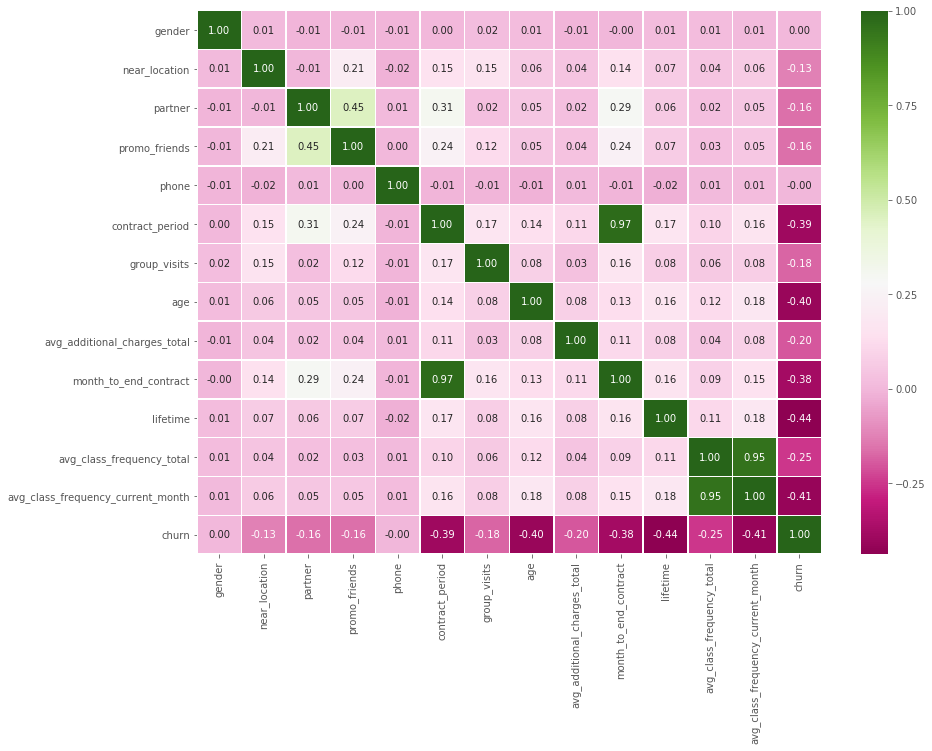

In [ ]:
cm = data.corr()
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True, fmt = '0.2f', linewidths = .5, cmap='PiYG')
plt.show()

Проанализировав матрицу корреляций замечаем мультиколлинеарные признаки:
* month to end contract - contract period (срок до окончания действия абонемента - длительность абонемента)
* avg class frequency current month - avg class frequency total (среднее количество посещений в неделю за прошедший месяц - среднее количество посещений с начала действия абонемента)

## Шаг 3. Построим модель прогнозирования оттока клиентов

In [ ]:
data.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце. А также удалим по одному признаку из пары сильно коррелирующих значений:

In [ ]:
X = data.drop(['churn', 'month_to_end_contract', 'avg_class_frequency_total'], axis = 1)
y = data['churn'] # разделим наши данные на признаки (матрица X) и целевую переменную (y)

Разделим модель на обучающую (train) и валидационную (test) выборки

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

Прежде чем строить модели, стандартизируем данные:

In [ ]:
# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

### Логистическая регрессия

При использовании модели логистической регрессии будем использовать стандартизированные данные

In [ ]:
lr_model = LogisticRegression(random_state=0, solver='lbfgs')
# обучим модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

### Случайный лес

In [ ]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state=0) # Ваш код здесь
# обучим модель случайного леса
rf_model.fit(X_train, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test) # Ваш код здесь
rf_probabilities = rf_model.predict_proba(X_test)[:,1] # Ваш код здесь

Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели. Какая модель показала себя лучше на основании метрик?

In [ ]:
print('Метрики Логистической регрессии:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_predictions)))

Метрики Логистической регрессии:
Accuracy: 0.90
Precision: 0.79
Recall: 0.82


In [ ]:
print('Метрики Случайного леса:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))

Метрики Случайного леса:
Accuracy: 0.90
Precision: 0.81
Recall: 0.75


В целом обе модели показали хорошие результаты, но значения метрик логистической регрессии немного лучше.

## Шаг 4. Сделаем кластеризацию клиентов

Отложим в сторону столбец с оттоком и проведем кластеризацию объектов (клиентов):
* Стандартизируем данные.
* Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму. На основании полученного графика предположим, какое количество кластеров можно выделить.
* Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. 
* Посмотрим на средние значения признаков для кластеров. 
* Построим распределения признаков для кластеров. 
* Для каждого полученного кластера посчитаем долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

Стандартизируем данные

In [ ]:
x = data.drop('churn', axis = 1)
sc = StandardScaler()
x_sc = sc.fit_transform(x)

Функцией linkage() на стандартизированной матрице признаков построим матрицу расстояний

In [ ]:
linked = linkage(x_sc, method = 'ward')

In [ ]:
linked

array([[9.70000000e+01, 3.22200000e+03, 1.00990653e-01, 2.00000000e+00],
       [2.61000000e+02, 3.17900000e+03, 1.22634574e-01, 2.00000000e+00],
       [8.90000000e+02, 1.75000000e+03, 1.28123291e-01, 2.00000000e+00],
       ...,
       [7.98700000e+03, 7.99500000e+03, 8.38725499e+01, 2.65600000e+03],
       [7.98800000e+03, 7.99600000e+03, 8.89563592e+01, 3.03400000e+03],
       [7.99200000e+03, 7.99700000e+03, 1.04627601e+02, 4.00000000e+03]])

Нарисуем дендрограмму

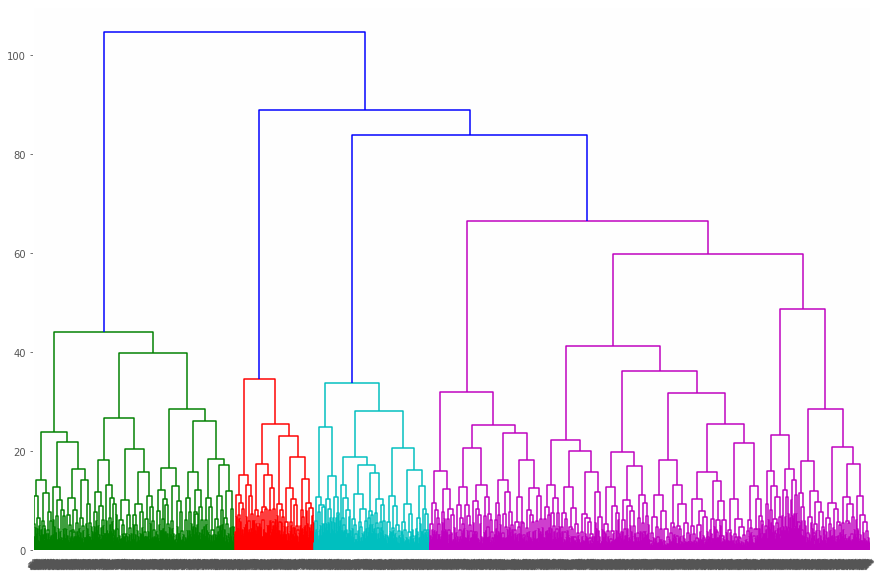

In [ ]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.xticks(rotation=45)
plt.show() 

На основе полученной дендрогаммы можем выделить 5 кластеров.
Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов.

In [ ]:
km = KMeans(random_state=0, n_clusters = 5)
labels = km.fit_predict(x_sc)
data['cluster'] = labels

In [ ]:
data.cluster.value_counts()

3    1262
0    1011
4     837
2     505
1     385
Name: cluster, dtype: int64

Посмотрим на средние значения признаков для кластеров.

In [ ]:
data.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.502473,0.522078,0.495050,0.485737,0.560335
near_location,0.959446,0.862338,0.000000,1.000000,0.976105
partner,0.783383,0.470130,0.463366,0.350238,0.356033
promo_friends,0.574679,0.306494,0.079208,0.240095,0.229391
phone,1.000000,0.000000,1.000000,1.000000,0.998805
contract_period,10.884273,4.787013,2.352475,1.948494,2.665472
group_visits,0.543027,0.425974,0.215842,0.341521,0.473118
age,29.980218,29.301299,28.477228,28.167987,30.127838
avg_additional_charges_total,160.706969,143.957664,135.457501,131.622204,161.724258
month_to_end_contract,9.950544,4.475325,2.198020,1.856577,2.455197


Посмотрев на средние значения признаков по кластерам можем сделать выводы:
* У всех кластеров, за исключением "2", спортзал расположен вблизи места проживания или работы;
* Больше всего клиентов, которые работают в компаниях-партнерах фитнес-центра, в кластере "0"
* В этом же кластере ("0") больше всего по сравнению с другими клиентов, которые впервые пришли в фитнес-центр по приглашению от знакомого.
* По длительности абонемента в среднем наиболее длительные абонементы приобретают клиенты из "0" кластера (в среднем 10 месяцев), наименьшие по длительности абонементы у "3" кластера.
* Также эти посетители фитнес-зала чаще остальных посещают групповые занятия. Наиболее редко ходят на групповые занятия клиенты из "2" кластера
* Средний возраст во всех кластерах примерно одинаковый и составляет 28-30 лет
* В среднем суммарная выручка от других услуг фитнес-клуба более высокая у "0" и "4" кластеров. 
* Дольше всего фитнес-центр посещают клиенты из "0" и "4" кластера. Меньше всего из "2" и "3".
* Чаще всего зал посещает "4" кластер (около 3 раз в неделю). Реже всего "3" (1 раз в неделю)
* Меньше всего в отток уходят клиенты из "0" кластера. Больше всего - из "3".

Построим гистограммы распеделения признаков по кластерам

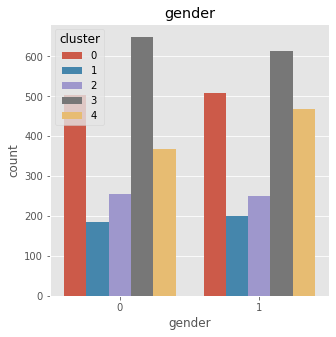

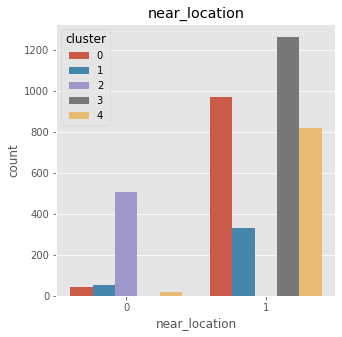

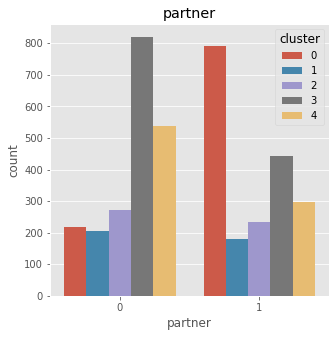

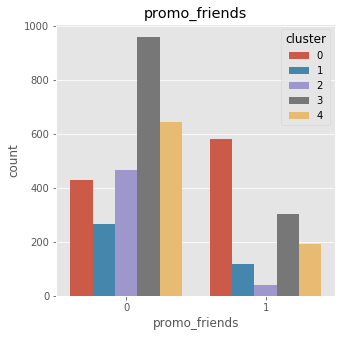

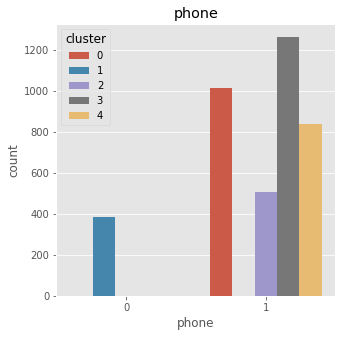

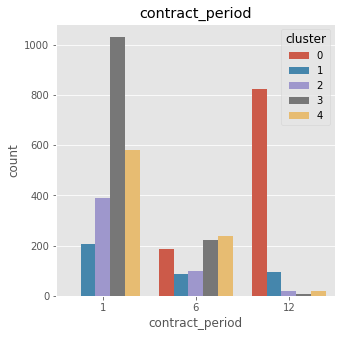

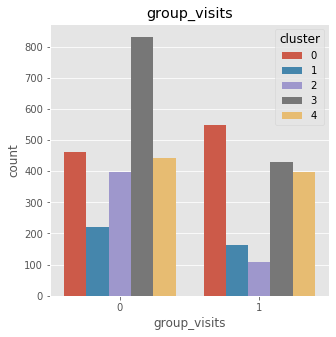

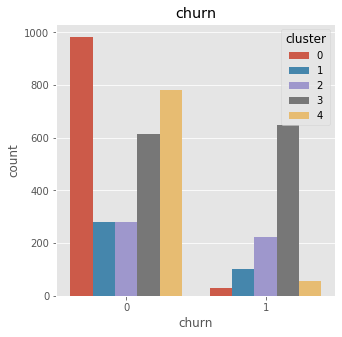

In [ ]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'churn']:
    plt.figure(figsize=(5,5))
    sns.countplot(x=data[column], hue = 'cluster', data=data)
    plt.title(column)
    plt.show()

Проанализировав графики, в целом, можем сделать те же выводы, что и выше (после таблицы по средним значениям). Также нужно отметить, что почти все клиенты из "0" кластера имеют абонемент на 12 месяцев. Большая их часть (почти 80%) являются сотрудниками компаний-партнеров фитнес-центра. И эти же клиенты менее всего уходят в отток. Вероятно организация за свой счет приобретает сотрудникам абонемент в фитнес-центр.

Чтобы подробнее проанализировать тех, кто ушел в отток и тех, кто остался, построим гистограммы по распределению признаков по кластером с учетом оттока клиентов.

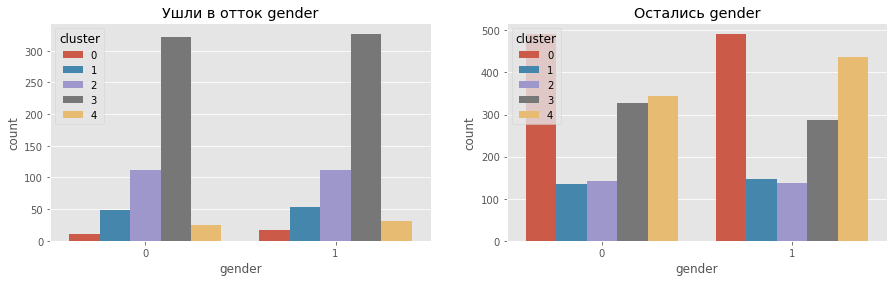

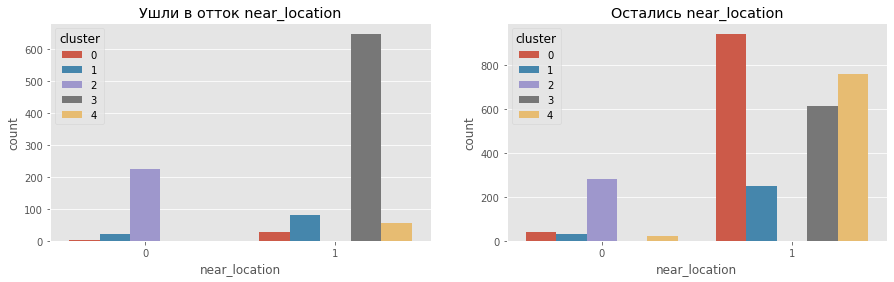

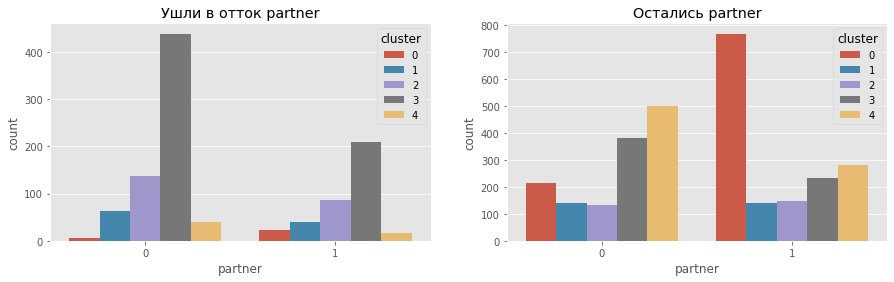

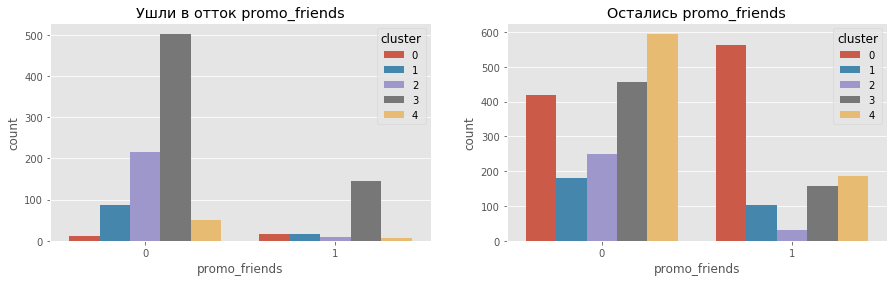

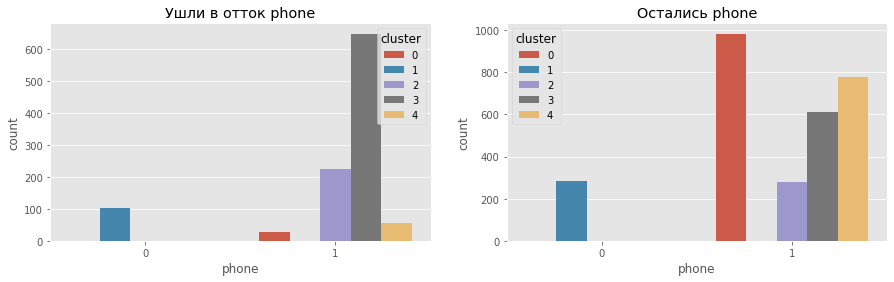

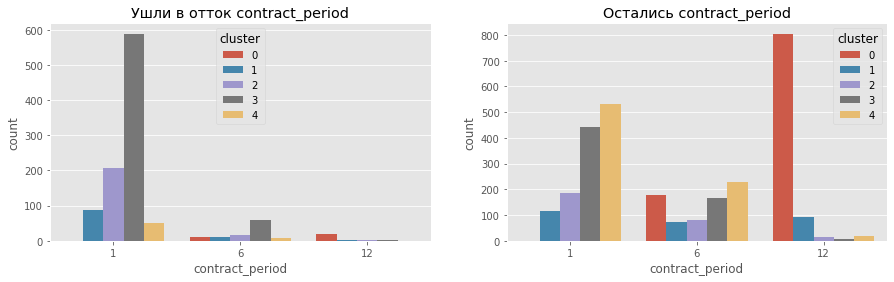

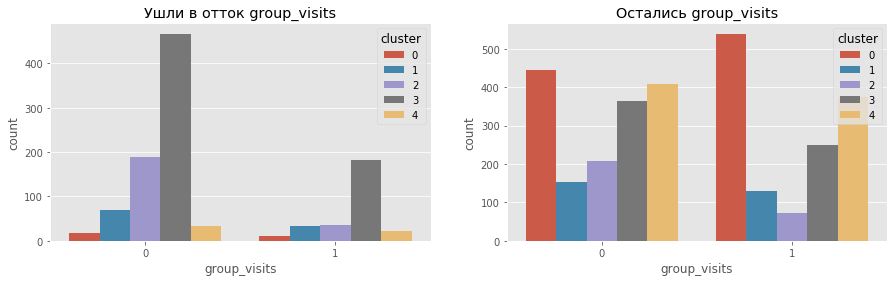

In [ ]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits']:
    fig, axes = plt.subplots(1, 2, figsize = (15, 4))
    sns.countplot(x = data.query('churn == 1')[column], hue = 'cluster', data=data, ax = axes[0])
    axes[0].set_title('Ушли в отток' + ' ' + column)
    sns.countplot(x = data.query('churn == 0')[column], hue = 'cluster', data=data, ax = axes[1])
    axes[1].set_title('Остались' + ' ' + column)
    plt.show()

Признаки, которые мы не учли при построении гистограмм, отобразим в виде боксплотов

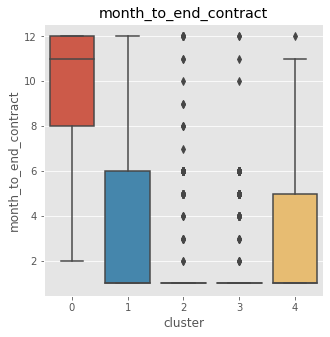

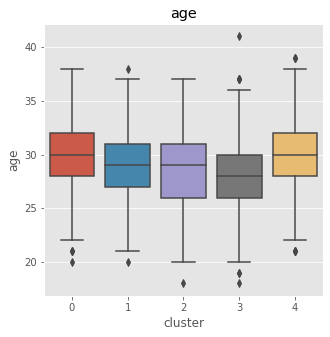

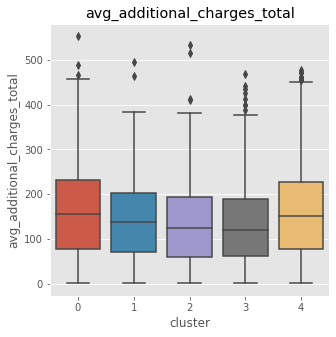

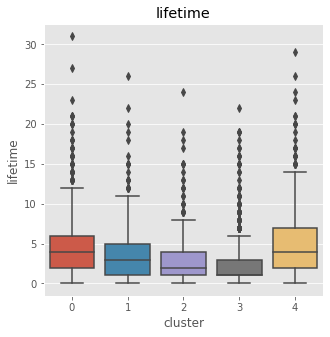

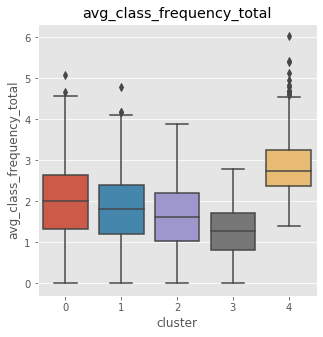

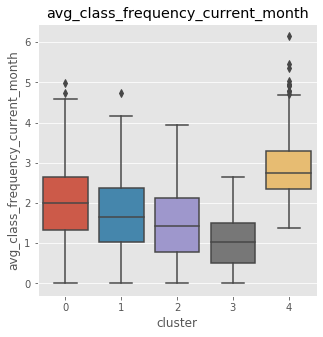

In [ ]:
for column in ['month_to_end_contract', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(5,5))
    sns.boxplot(x='cluster', y=data[column], data=data)
    plt.title(column)
    plt.show()

* Больше всего времени до окончания действия абонемента у клиентов "0" кластера (что и понятно, так как почти у всех абонемент на 12 месяцев)
* Чем клиент моложе, тем вероятнее, что он уйдет в отток
* Клиенты из "0" и "4" кластера больше всего платят за дополнительные услуги фитнес-центра
* Посетители "4" кластера чаще остальных посещают зал

In [ ]:
data.groupby('cluster')['churn'].agg('mean').reset_index().sort_values(by='churn', ascending=False)

,cluster,churn
3,3,0.514263
2,2,0.443564
1,1,0.267532
4,4,0.068100
0,0,0.027695


Как мы уже заметили выше наиболее надежны кластеры по номерами "0" и "4" (доля оттока у них составляет 2% и 6% соответственно). Больше всего склонны к оттоку "3" и "2" кластеры (отток: 51% и 44%)

## Шаг 5. Сформулируем выводы и сделаем базовые рекомендации по работе с клиентами

Самый лучший кластер, где отток клиентов меньше всего - номер 0. Как мы можем охарактеризовать клиента из самого надежного для нас кластера?
* Клиент является сотрудником компании-партера;
* Фитнес-центр располагается вблизи места проживания или работы;
* Длительность абонемента составляет 12 месяцев;
* Посещает групповые занятия;
* Приобретает дополнительные услуги клуба;
* Посещает зал не менее 2-3 раз в неделю;

Проведя анализ данных сети фитнес-центров «Культурист-датасаентист» можем дать следующие рекомендации для стратегии взаимодействия с клиентами и их удержания:
* Предлагать клиентам дополнительные услуги (но не навязыванием, что может наоборот оттолкнуть клиентов), устраивать акции, возможно увеличить разнообразие дополнительных услуг.
* Включать в абонемент беспланые гостевые визиты с расчетом на последующую покупку гостем абонемента (можно сделать бонусы для клиента, если тот приведет друга, который купит абонемент)
* Узнать у посетителей, какие групповые занятия они хотели бы посещать (провести опрос, добавить новые виды групповых занятий).
* Проводить акции для тех, кто покупает абонемент на более длительный период (1 год), возможность рассрочки.
* Заключать договора с компаниями по приобретению абонементов для своих сотрудников.